<Figure size 432x288 with 0 Axes>

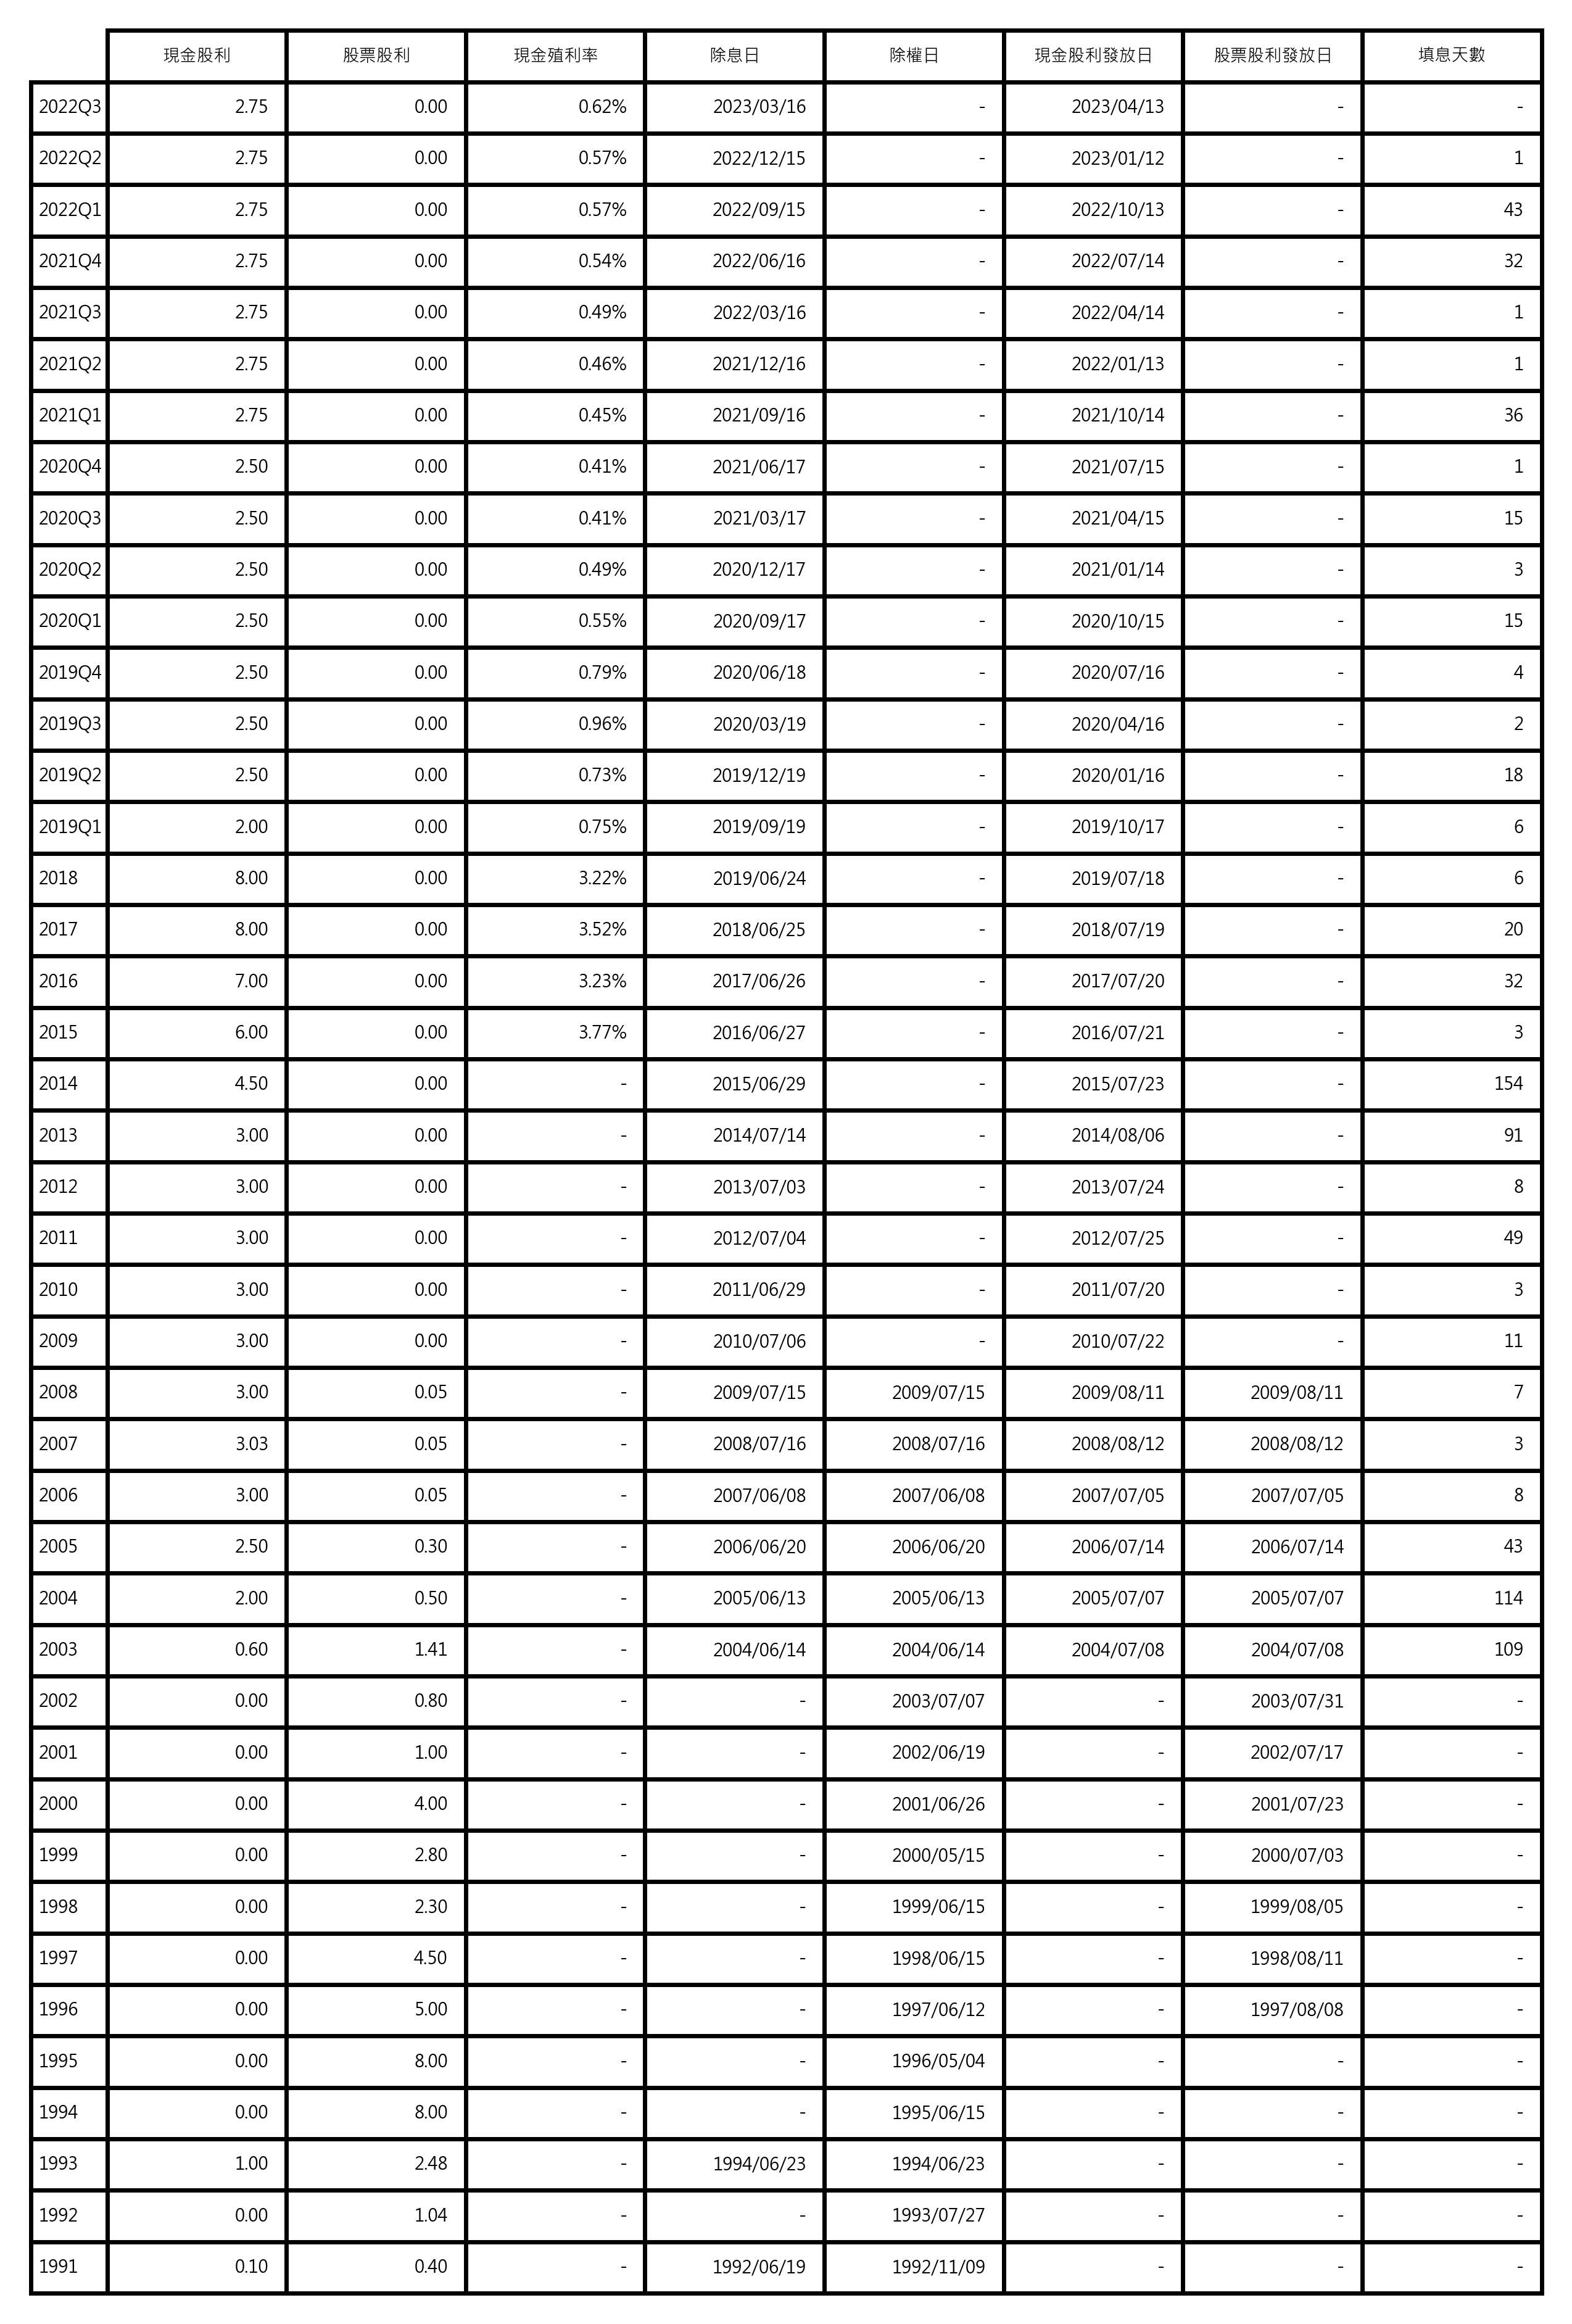

In [28]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pyimgur
import pandas as pd
message = "2330.TW"
url = "https://tw.stock.yahoo.com/quote/" + str(message) + "/dividend"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36"
}
res = requests.get(url,headers=headers)
# while str(res) != "":
#     res = requests.get(url,headers= headers)
soup = BeautifulSoup(res.text,"html.parser")
list_n = soup.find("div",{"class":"table-body-wrapper"}).find_all("li",{"class":"List(n)"})
list_n
data_all = []
for i in  range(len(list_n)):
    period = list_n[i].find("div",{"class":"D(f) W(84px) Ta(start)"}).text
    dividend = list_n[i].find_all("div",{"class":"Fxg(1) Fxs(1) Fxb(0%) Ta(end) Mend($m-table-cell-space) Mend(0):lc Miw(62px)"})
    cash_dividend = dividend[0].text
    stock_dividend = dividend[1].text
    days = list_n[i].find_all("div",{"class":"Fxg(1) Fxs(1) Fxb(0%) Ta(end) Mend($m-table-cell-space) Mend(0):lc Miw(108px)"})
    int_date = list_n[i].find_all("div",{"class":"Fxg(1) Fxs(1) Fxb(0%) Ta(end) Mend($m-table-cell-space) Mend(0):lc Miw(70px)"})
    cash_rate = int_date[0].text
    ex_dividend_date  = days[0].text
    ex_rights_date = days[1].text
    cash_payment_date = days[2].text
    stock_payment_date = days[3].text
    interest_date = int_date[1].text
    data_one = {
        "股利所屬期間" : period,
        "現金股利" : cash_dividend,
        "股票股利" : stock_dividend,
        "現金殖利率":cash_rate,
        "除息日" : ex_dividend_date,
        "除權日" : ex_rights_date,
        "現金股利發放日" : cash_payment_date,
        "股票股利發放日" : stock_payment_date,
        "填息天數" : interest_date
    }
    data_all.append(data_one)
data_all


df = pd.DataFrame(data_all)
df.index = df["股利所屬期間"]
df.drop("股利所屬期間",axis = 1,inplace=True)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure('歷年股利')            # 視窗名稱
plt.figure(dpi = 500)
ax = plt.axes(frame_on=False)# 不要額外框線
ax.xaxis.set_visible(False)  # 隱藏X軸刻度線
ax.yaxis.set_visible(False)  # 隱藏Y軸刻度線
pd.plotting.table(ax, df, loc='center')
plt.savefig(str(message) + "歷年股利.png", bbox_inches = "tight")
CLIENT_ID = "1c11336262869d4"
PATH = str(message) + "歷年股利.png" #A Filepath to an image on your computer"
title = str(message) + "歷年股利"
im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title=title)
